In [1]:
from src.utils.utils import get_algo_by_name, get_env_by_name
from src.utils.save_results import get_task_name, get_metrics_information, get_results_file_name
import numpy as np
import time
import os
from datetime import date
from tqdm import tqdm
from tqdm.notebook import trange, tqdm
today = date.today()
import matplotlib.pyplot as plt
# import seaborn as sns; sns.set()

def do_single_experiment(rd, settings):
    env = get_env_by_name(settings)
    env.set()
    agent = get_algo_by_name(settings)
    agent.set_environment(env)
    metrics = agent.iterate_learning()
    return metrics

# Blue Bus Red Bus paradox

In [2]:
nb_rds = 20
max_rounds = 1000
# nb_leaves_per_class = 10
nb_levels = 2

def do_paradox_experiment(nb_childs):

    exp3_regrets = np.zeros((nb_rds, int(max_rounds/100)))
    exp3_rewards = np.zeros((nb_rds, int(max_rounds/100)))
    new_regrets = np.zeros((nb_rds, int(max_rounds/100)))
    new_rewards = np.zeros((nb_rds, int(max_rounds/100)))

    for rd in range(nb_rds):
        settings = {
            'rd': rd,
            'max_rounds': max_rounds,
            'nb_leaves_per_class': nb_childs,
            'nb_levels': nb_levels,
            'env': 'paradox',
            'algo': 'exp3',
        }
        metrics = do_single_experiment(rd, settings)
        rounds = metrics['round']
        exp3_regrets[rd] = metrics['regret']
        exp3_rewards[rd] = metrics['reward']
        
        settings['algo'] = 'new'
        metrics = do_single_experiment(rd, settings)
        rounds = metrics['round']
        new_regrets[rd] = metrics['regret']
        new_rewards[rd] = metrics['reward']

    # EXP3
    exp3_rgrt_std = np.std(exp3_regrets, axis=0)
    exp3_rwd_std = np.std(exp3_rewards, axis=0)
    exp3_regret = np.mean(exp3_regrets, axis=0)
    exp3_reward = np.mean(exp3_rewards, axis=0)
    
    exp3_result = (exp3_regret, exp3_rgrt_std, exp3_reward, exp3_rwd_std)

    # NEW
    new_rgrt_std = np.std(new_regrets, axis=0)
    new_rwd_std = np.std(new_rewards, axis=0)
    new_regret = np.mean(new_regrets, axis=0) 
    new_reward = np.mean(new_rewards, axis=0)
    
    new_result = (new_regret, new_rgrt_std, new_reward, new_rwd_std)
    
    return exp3_result, new_result, list(np.array(exp3_regrets)[:,-1]), list(np.array(new_regrets)[:,-1])

### Perform Experiment

In [3]:
nb_childs = [2, 5, 10, 50]
res_nexp = []
res_exp3 = []
res=[]
labels=[]
exp3_results = []
new_results = []

for nb_child in nb_childs:
    a,b,c,d = do_paradox_experiment(nb_child)
    res_exp3.append(list(c))
    res_nexp.append(d)
    res.append(c)
    res.append(d)
    labels.append('EXP3 - N {}'.format(nb_child))
    labels.append('NEW - N {}'.format(nb_child))
    exp3_results.append(a)
    new_results.append(b)

100%|██████████████████████████████████████| 1000/1000 [00:00<00:00, 10988.17it/s]


100%|██████████████████████████████████████| 1000/1000 [00:00<00:00, 12201.51it/s]


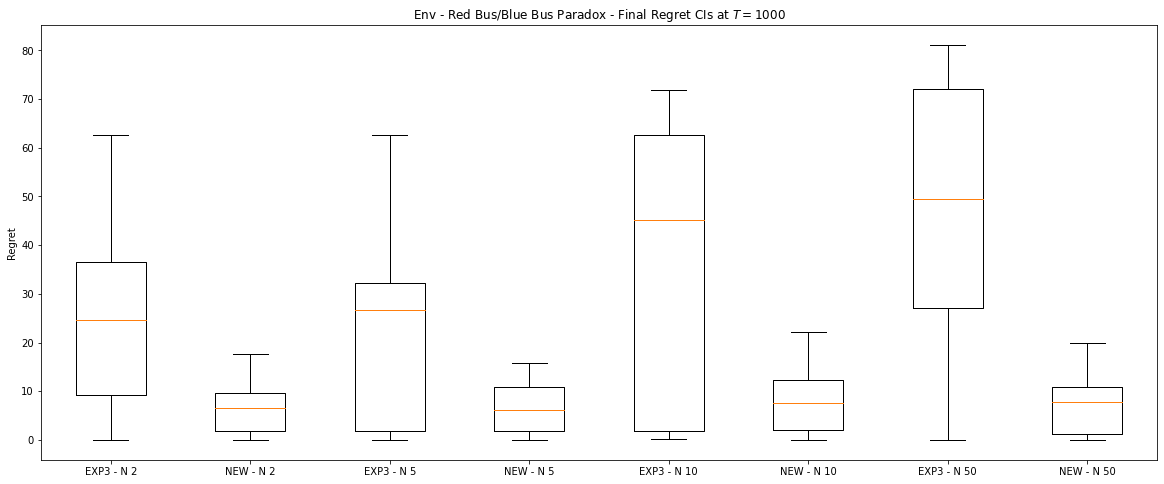

In [4]:
plt.figure(figsize=(20,8))
plt.boxplot(res, labels=labels)
plt.ylabel('Regret')
plt.title('Env - Red Bus/Blue Bus Paradox - Final Regret CIs at $T=1000$')

plt.savefig('figure_bbrb_regret_slice.pdf', bbox_inches = "tight")
plt.show()

### Plot results

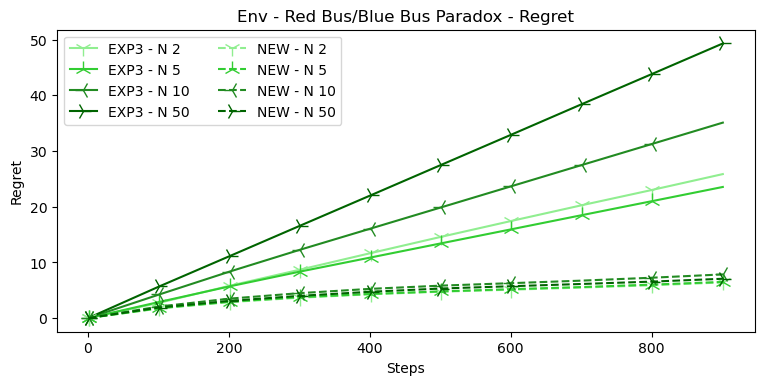

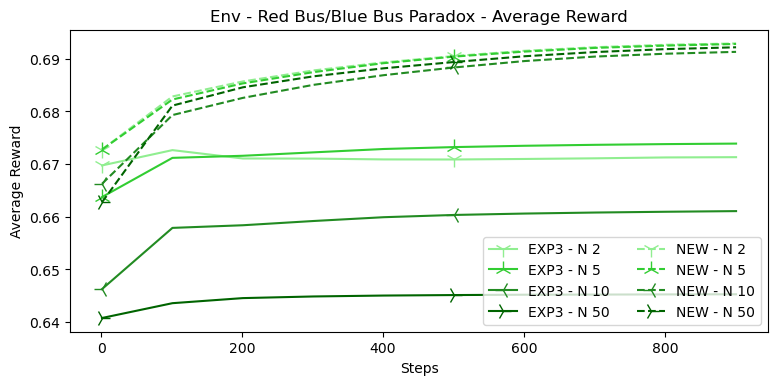

In [5]:
rounds = np.arange(1, max_rounds+1, 100)

colors_exp3 = ['lightsteelblue', 'cornflowerblue', 'royalblue', '#1f77b4']
# colors_new = ['#ff7f0e', 'tomato', 'peru', 'gold']
colors_new = ['lightgreen', 'limegreen', 'forestgreen', 'darkgreen']

nb_childs = [2, 5, 10, 50]
markers = ["1", "2", "3", "4"]
# markers = ["*", "+", ".", "v"]


plt.figure(figsize=(9,4), dpi= 100, facecolor='w', edgecolor='k')
for idx, exp3_result in enumerate(exp3_results):
    # EXP3 
    c = colors_new[idx]
    exp3_regret, exp3_rgrt_std, exp3_reward, exp3_rwd_std = exp3_result
    plt.plot(rounds, exp3_regret, label='EXP3 - N {}'.format(nb_childs[idx]), color=c, linestyle='-', 
             marker=markers[idx] , markersize=12 ,markevery=0.1)
# plt.plot(rounds, .5*rounds**(0.5), label='$t^{0.5}$', linestyle='-.')
    
for idx, new_result in enumerate(new_results):
    # new
    c = colors_new[idx]
    new_regret, new_rgrt_std, new_reward, new_rwd_std = new_result
    plt.plot(rounds, new_regret, label='NEW - N {}'.format(nb_childs[idx]), color=c, linestyle='--', 
             marker=markers[idx] , markersize=12 ,markevery=0.1)
# plt.plot(rounds, .05*rounds**(1), label='$t^{1}$', linestyle='-.')
plt.xlabel('Steps')
plt.ylabel('Regret')
plt.title('Env - Red Bus/Blue Bus Paradox - Regret')
# plt.xscale('log')
# plt.yscale('log')
# plt.ylim(0.1, 55)
# plt.xlim(1, 1000)
plt.legend(ncol=2)
plt.savefig('figure_bbrb_regret.pdf', bbox_inches = "tight")
plt.show()

plt.figure(figsize=(9,4), dpi= 100, facecolor='w', edgecolor='k')

for idx, exp3_result in enumerate(exp3_results):
    
    # EXP3 
    c = colors_new[idx]
    exp3_regret, exp3_rgrt_std, exp3_reward, exp3_rwd_std = exp3_result
    plt.plot(rounds, exp3_reward, label='EXP3 - N {}'.format(nb_childs[idx]), color=c, linestyle='-', 
             marker=markers[idx] , markersize=12 ,markevery=5)
    
for idx, new_result in enumerate(new_results):
        
    # new 
    c = colors_new[idx]
    new_regret, new_rgrt_std, new_reward, new_rwd_std = new_result
    plt.plot(rounds, new_reward, label='NEW - N {}'.format(nb_childs[idx]), color=c, linestyle='--', 
             marker=markers[idx] , markersize=12 ,markevery=5)
      
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Env - Red Bus/Blue Bus Paradox - Average Reward')
plt.legend(ncol=2)
plt.savefig('figure_bbrb_avg_reward.pdf', bbox_inches = "tight")

# fig.suptitle("Env - Blue Bus Red Bus Paradox", fontsize=14)
plt.show()

# General Trees

In [6]:
nb_rds = 20
max_rounds = 10000

def do_general_tree_experiment(nb_levels, nb_leaves_per_class):

    exp3_regrets = np.zeros((nb_rds, int(max_rounds/100)))
    exp3_rewards = np.zeros((nb_rds, int(max_rounds/100)))
    new_regrets = np.zeros((nb_rds, int(max_rounds/100)))
    new_rewards = np.zeros((nb_rds, int(max_rounds/100)))
    
    for rd in range(nb_rds):
        settings = {
            'rd': rd,
            'max_rounds': max_rounds,
            'nb_leaves_per_class': nb_leaves_per_class,
            'nb_levels': nb_levels,
            'env': 'general',
            'algo': 'exp3'
        }
        
        print('Running experiment with rnd seed {}, nb levels {}, nb leaves per class {}'.format(rd, nb_levels, nb_leaves_per_class))
        
        
        metrics = do_single_experiment(rd, settings)
        rounds = metrics['round']
        exp3_regrets[rd] = metrics['regret']
        exp3_rewards[rd] = metrics['reward']
        
        settings['algo'] = 'new'
        metrics = do_single_experiment(rd, settings)
        rounds = metrics['round']
        new_regrets[rd] = metrics['regret']
        new_rewards[rd] = metrics['reward']

    # EXP3
    exp3_rgrt_std = np.std(exp3_regrets, axis=0)
    exp3_rwd_std = np.std(exp3_rewards, axis=0)
    exp3_regret = np.mean(exp3_regrets, axis=0)
    exp3_reward = np.mean(exp3_rewards, axis=0)
    
    exp3_result = (exp3_regret, exp3_rgrt_std, exp3_reward, exp3_rwd_std)

    # new
    new_rgrt_std = np.std(new_regrets, axis=0)
    new_rwd_std = np.std(new_rewards, axis=0)
    new_regret = np.mean(new_regrets, axis=0) 
    new_reward = np.mean(new_rewards, axis=0)
    
    new_result = (new_regret, new_rgrt_std, new_reward, new_rwd_std)
    
    return exp3_result, new_result, list(np.array(exp3_regrets)[:,-1]), list(np.array(new_regrets)[:,-1])

In [7]:
settings = [(2, 50), (2, 100), (2, 200)]
res_nexp = []
res_exp3 = []
res=[]
labels=[]
exp3_results = []
new_results = []

for setting in settings:
    nb_levels, nb_leaves_per_class = setting
    exp3_result, new_result, c,d = do_general_tree_experiment(nb_levels, nb_leaves_per_class)
    exp3_results.append(exp3_result)
    new_results.append(new_result)
    res_exp3.append((c))
    res_nexp.append(d)
    res.append(c)
    res.append(d)
    labels.append('EXP3 - L {}, M {}'.format(nb_levels, nb_leaves_per_class))
    labels.append('NEW - L {}, M {}'.format(nb_levels, nb_leaves_per_class))

Running experiment with rnd seed 0, nb levels 2, nb leaves per class 50


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 5925.87it/s]


Running experiment with rnd seed 1, nb levels 2, nb leaves per class 50


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 5771.25it/s]


Running experiment with rnd seed 2, nb levels 2, nb leaves per class 50


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6808.07it/s]


Running experiment with rnd seed 3, nb levels 2, nb leaves per class 50


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6375.79it/s]


Running experiment with rnd seed 4, nb levels 2, nb leaves per class 50


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6882.89it/s]


Running experiment with rnd seed 5, nb levels 2, nb leaves per class 50


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6772.25it/s]


Running experiment with rnd seed 6, nb levels 2, nb leaves per class 50


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6820.63it/s]


Running experiment with rnd seed 7, nb levels 2, nb leaves per class 50


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6881.48it/s]


Running experiment with rnd seed 8, nb levels 2, nb leaves per class 50


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6701.97it/s]


Running experiment with rnd seed 9, nb levels 2, nb leaves per class 50


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6575.08it/s]


Running experiment with rnd seed 10, nb levels 2, nb leaves per class 50


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6879.48it/s]


Running experiment with rnd seed 11, nb levels 2, nb leaves per class 50


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6779.95it/s]


Running experiment with rnd seed 12, nb levels 2, nb leaves per class 50


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6840.71it/s]


Running experiment with rnd seed 13, nb levels 2, nb leaves per class 50


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6825.18it/s]


Running experiment with rnd seed 14, nb levels 2, nb leaves per class 50


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 5510.16it/s]


Running experiment with rnd seed 15, nb levels 2, nb leaves per class 50


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6657.01it/s]


Running experiment with rnd seed 16, nb levels 2, nb leaves per class 50


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6893.94it/s]


Running experiment with rnd seed 17, nb levels 2, nb leaves per class 50


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6735.62it/s]


Running experiment with rnd seed 18, nb levels 2, nb leaves per class 50


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6646.11it/s]


Running experiment with rnd seed 19, nb levels 2, nb leaves per class 50


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6509.62it/s]


Running experiment with rnd seed 0, nb levels 2, nb leaves per class 100


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 5753.25it/s]


Running experiment with rnd seed 1, nb levels 2, nb leaves per class 100


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6460.67it/s]


Running experiment with rnd seed 2, nb levels 2, nb leaves per class 100


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6470.22it/s]


Running experiment with rnd seed 3, nb levels 2, nb leaves per class 100


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6068.63it/s]


Running experiment with rnd seed 4, nb levels 2, nb leaves per class 100


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 5649.65it/s]


Running experiment with rnd seed 5, nb levels 2, nb leaves per class 100


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6342.29it/s]


Running experiment with rnd seed 6, nb levels 2, nb leaves per class 100


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6648.10it/s]


Running experiment with rnd seed 7, nb levels 2, nb leaves per class 100


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 5916.78it/s]


Running experiment with rnd seed 8, nb levels 2, nb leaves per class 100


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6614.27it/s]


Running experiment with rnd seed 9, nb levels 2, nb leaves per class 100


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6237.59it/s]


Running experiment with rnd seed 10, nb levels 2, nb leaves per class 100


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6689.44it/s]


Running experiment with rnd seed 11, nb levels 2, nb leaves per class 100


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6225.21it/s]


Running experiment with rnd seed 12, nb levels 2, nb leaves per class 100


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6434.43it/s]


Running experiment with rnd seed 13, nb levels 2, nb leaves per class 100


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6646.71it/s]


Running experiment with rnd seed 14, nb levels 2, nb leaves per class 100


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6649.06it/s]


Running experiment with rnd seed 15, nb levels 2, nb leaves per class 100


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6580.71it/s]


Running experiment with rnd seed 16, nb levels 2, nb leaves per class 100


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6608.69it/s]


Running experiment with rnd seed 17, nb levels 2, nb leaves per class 100


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6349.93it/s]


Running experiment with rnd seed 18, nb levels 2, nb leaves per class 100


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6661.67it/s]


Running experiment with rnd seed 19, nb levels 2, nb leaves per class 100


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 5880.68it/s]


Running experiment with rnd seed 0, nb levels 2, nb leaves per class 200


100%|█████████████████████████████████████| 10000/10000 [00:02<00:00, 4397.12it/s]


Running experiment with rnd seed 1, nb levels 2, nb leaves per class 200


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 5580.56it/s]


Running experiment with rnd seed 2, nb levels 2, nb leaves per class 200


100%|█████████████████████████████████████| 10000/10000 [00:02<00:00, 4435.56it/s]


Running experiment with rnd seed 3, nb levels 2, nb leaves per class 200


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 5558.64it/s]


Running experiment with rnd seed 4, nb levels 2, nb leaves per class 200


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 5152.61it/s]


Running experiment with rnd seed 5, nb levels 2, nb leaves per class 200


100%|█████████████████████████████████████| 10000/10000 [00:02<00:00, 4794.08it/s]


Running experiment with rnd seed 6, nb levels 2, nb leaves per class 200


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 5392.06it/s]


Running experiment with rnd seed 7, nb levels 2, nb leaves per class 200


100%|█████████████████████████████████████| 10000/10000 [00:02<00:00, 4861.61it/s]


Running experiment with rnd seed 8, nb levels 2, nb leaves per class 200


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 5495.64it/s]


Running experiment with rnd seed 9, nb levels 2, nb leaves per class 200


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 5657.59it/s]


Running experiment with rnd seed 10, nb levels 2, nb leaves per class 200


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 5850.41it/s]


Running experiment with rnd seed 11, nb levels 2, nb leaves per class 200


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 5547.40it/s]


Running experiment with rnd seed 12, nb levels 2, nb leaves per class 200


100%|█████████████████████████████████████| 10000/10000 [00:02<00:00, 4146.29it/s]


Running experiment with rnd seed 13, nb levels 2, nb leaves per class 200


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 5187.08it/s]


Running experiment with rnd seed 14, nb levels 2, nb leaves per class 200


100%|█████████████████████████████████████| 10000/10000 [00:02<00:00, 4178.03it/s]


Running experiment with rnd seed 15, nb levels 2, nb leaves per class 200


100%|█████████████████████████████████████| 10000/10000 [00:02<00:00, 4121.29it/s]


Running experiment with rnd seed 16, nb levels 2, nb leaves per class 200


100%|█████████████████████████████████████| 10000/10000 [00:02<00:00, 4573.35it/s]


Running experiment with rnd seed 17, nb levels 2, nb leaves per class 200


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 5198.43it/s]


Running experiment with rnd seed 18, nb levels 2, nb leaves per class 200


100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 5583.24it/s]


Running experiment with rnd seed 19, nb levels 2, nb leaves per class 200


100%|█████████████████████████████████████| 10000/10000 [00:02<00:00, 4747.00it/s]


No handles with labels found to put in legend.


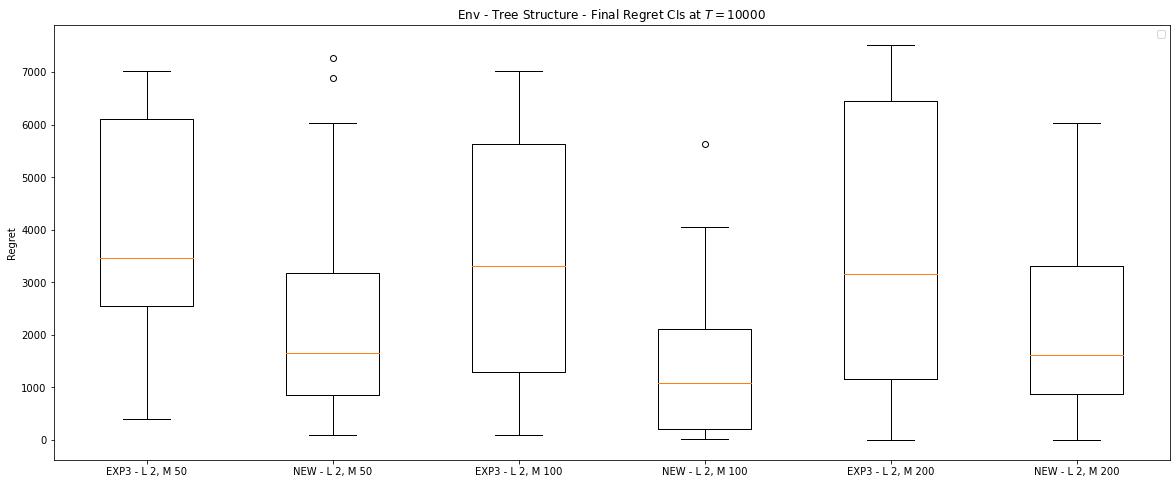

In [8]:
plt.figure(figsize=(20,8))
plt.boxplot(res, labels=labels)
plt.ylabel('Regret')
plt.title('Env - Tree Structure - Final Regret CIs at $T=10000$')
plt.legend(ncol=2)
plt.savefig('figure_general_regret_breadth_slice.pdf', bbox_inches = "tight")
plt.show()

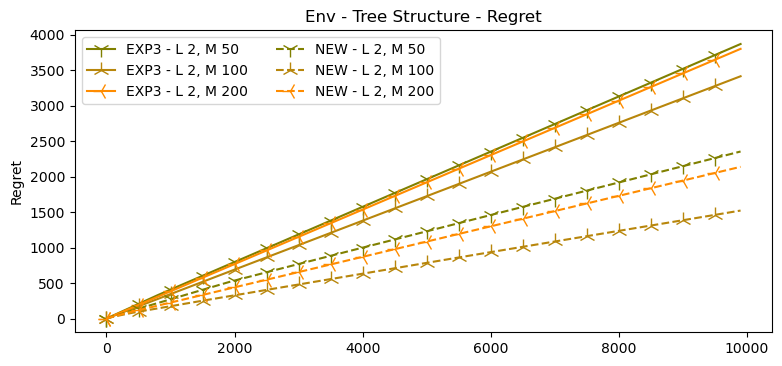

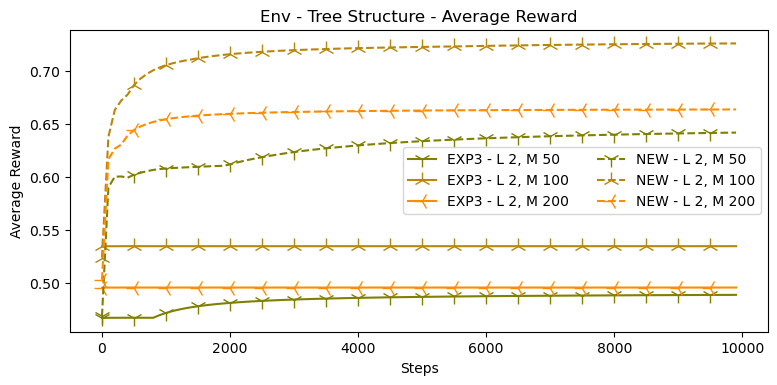

In [11]:
rounds = np.arange(1, max_rounds+1, 100)

colors_exp3 = ['#1f77b4', 'mediumpurple', 'mediumblue', 'grey']
colors_new = ['#ff7f0e', 'tomato', 'peru', 'gold']

colors_exp3 = ['lightsteelblue', 'cornflowerblue', 'royalblue', '#1f77b4', 'blue', 'darkblue']
# colors_new = ['#ff7f0e', 'tomato', 'peru', 'gold']
# colors_new = ['lightgreen', 'limegreen', 'forestgreen', 'darkgreen', 'darkcyan', 'darkslategrey']

colors_exp3 = ['olive', 'darkgoldenrod', 'darkorange']


settings = [(2, 50), (2, 100), (2, 200)]
markers = ['-', '--']
markers = ["1", "2", "3", "4"]
# markers = ["*", "+", ".", "v"]

plt.figure(figsize=(9,4), dpi= 100, facecolor='w', edgecolor='k')
for idx, exp3_result in enumerate(exp3_results):
    # EXP3 
    c = colors_exp3[idx]
    exp3_regret, exp3_rgrt_std, exp3_reward, exp3_rwd_std = exp3_result
    plt.plot(rounds, exp3_regret, label='EXP3 - L {}, M {}'.format(settings[idx][0], settings[idx][1]), color=c, linestyle='-',
             marker=markers[idx] , markersize=12 ,markevery=5)
# plt.plot(rounds, rounds**(0.5), label='$t^{0.5}$', ls='-.')     
for idx, new_result in enumerate(new_results[:3]):
    # new
    c = colors_exp3[idx]
    new_regret, new_rgrt_std, new_reward, new_rwd_std = new_result
    plt.plot(rounds, new_regret, label='NEW - L {}, M {}'.format(settings[idx][0], settings[idx][1]), color=c, linestyle='--',
             marker=markers[idx] , markersize=12 ,markevery=5)


# plt.xscale('log')
# plt.yscale('log')
plt.ylabel('Regret')
plt.title('Env - Tree Structure - Regret')
plt.legend(ncol=2)
plt.savefig('figure_general_regret_breadth.pdf', bbox_inches = "tight")
plt.show()

plt.figure(figsize=(9,4), dpi= 100, facecolor='w', edgecolor='k')

for idx, exp3_result in enumerate(exp3_results):
    
    # EXP3 
    c = colors_exp3[idx]
    exp3_regret, exp3_rgrt_std, exp3_reward, exp3_rwd_std = exp3_result
    plt.plot(rounds, exp3_reward, label='EXP3 - L {}, M {}'.format(settings[idx][0], settings[idx][1]), color=c, linestyle='-',
             marker=markers[idx] , markersize=12 ,markevery=5)
    
for idx, new_result in enumerate(new_results):
        
    # new 
    c = colors_exp3[idx]
    new_regret, new_rgrt_std, new_reward, new_rwd_std = new_result
    plt.plot(rounds, new_reward, label='NEW - L {}, M {}'.format(settings[idx][0], settings[idx][1]), color=c, linestyle='--',
             marker=markers[idx] , markersize=12 ,markevery=5)

plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Env - Tree Structure - Average Reward')
plt.legend(ncol=2)
plt.savefig('figure_general_avg_reward_breadth.pdf', bbox_inches = "tight")

# fig.suptitle("Env - Blue Bus Red Bus Paradox", fontsize=14)
plt.show()



In [12]:
settings = [(4, 3), (5, 3), (6, 3)]
res_nexp = []
res_exp3 = []
res=[]
labels=[]
exp3_results = []
new_results = []


for setting in tqdm(settings):
    nb_levels, nb_leaves_per_class = setting
    exp3_result, new_result, c, d = do_general_tree_experiment(nb_levels, nb_leaves_per_class)
    exp3_results.append(exp3_result)
    new_results.append(new_result)
    res_exp3.append((c))
    res_nexp.append(d)
    res.append(c)
    res.append(d)
    labels.append('EXP3 - L {}, M {}'.format(nb_levels, nb_leaves_per_class))
    labels.append('NEW - L {}, M {}'.format(nb_levels, nb_leaves_per_class))

  0%|          | 0/3 [00:00<?, ?it/s]

Running experiment with rnd seed 0, nb levels 4, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6652.15it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 3227.62it/s]


Running experiment with rnd seed 1, nb levels 4, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 7358.16it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 3178.28it/s]


Running experiment with rnd seed 2, nb levels 4, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 7364.25it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 3242.93it/s]


Running experiment with rnd seed 3, nb levels 4, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 7568.05it/s]

100%|█████████████████████████████████████| 10000/10000 [00:02<00:00, 3433.18it/s]


Running experiment with rnd seed 4, nb levels 4, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 7232.30it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 2944.16it/s]


Running experiment with rnd seed 5, nb levels 4, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6773.44it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 2874.44it/s]


Running experiment with rnd seed 6, nb levels 4, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 7386.30it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 3271.76it/s]


Running experiment with rnd seed 7, nb levels 4, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9308.81it/s]

100%|█████████████████████████████████████| 10000/10000 [00:02<00:00, 3457.78it/s]


Running experiment with rnd seed 8, nb levels 4, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6575.67it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 3102.11it/s]


Running experiment with rnd seed 9, nb levels 4, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6894.33it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 3163.58it/s]


Running experiment with rnd seed 10, nb levels 4, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 7634.17it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 3113.06it/s]


Running experiment with rnd seed 11, nb levels 4, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 7562.95it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 3153.06it/s]


Running experiment with rnd seed 12, nb levels 4, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6963.69it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 3124.83it/s]


Running experiment with rnd seed 13, nb levels 4, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6429.28it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 3119.16it/s]


Running experiment with rnd seed 14, nb levels 4, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 7170.87it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 2827.29it/s]


Running experiment with rnd seed 15, nb levels 4, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6715.53it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 3252.98it/s]


Running experiment with rnd seed 16, nb levels 4, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 7151.66it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 3022.33it/s]


Running experiment with rnd seed 17, nb levels 4, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 7451.89it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 3001.72it/s]


Running experiment with rnd seed 18, nb levels 4, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 7058.80it/s]

100%|█████████████████████████████████████| 10000/10000 [00:02<00:00, 3438.09it/s]


Running experiment with rnd seed 19, nb levels 4, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 7622.74it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 3170.82it/s]


Running experiment with rnd seed 0, nb levels 5, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6236.67it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 2678.34it/s]


Running experiment with rnd seed 1, nb levels 5, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6013.66it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 2666.34it/s]


Running experiment with rnd seed 2, nb levels 5, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6170.90it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 2673.88it/s]


Running experiment with rnd seed 3, nb levels 5, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 5990.81it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 2797.18it/s]


Running experiment with rnd seed 4, nb levels 5, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6295.78it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 2736.55it/s]


Running experiment with rnd seed 5, nb levels 5, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 5945.42it/s]

100%|█████████████████████████████████████| 10000/10000 [00:04<00:00, 2385.01it/s]


Running experiment with rnd seed 6, nb levels 5, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6040.74it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 2533.39it/s]


Running experiment with rnd seed 7, nb levels 5, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6836.48it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 2578.72it/s]


Running experiment with rnd seed 8, nb levels 5, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 5430.57it/s]

100%|█████████████████████████████████████| 10000/10000 [00:04<00:00, 2480.69it/s]


Running experiment with rnd seed 9, nb levels 5, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6313.85it/s]

100%|█████████████████████████████████████| 10000/10000 [00:04<00:00, 2396.95it/s]


Running experiment with rnd seed 10, nb levels 5, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6472.89it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 2581.93it/s]


Running experiment with rnd seed 11, nb levels 5, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6267.85it/s]

100%|█████████████████████████████████████| 10000/10000 [00:04<00:00, 2470.09it/s]


Running experiment with rnd seed 12, nb levels 5, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6178.21it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 2559.14it/s]


Running experiment with rnd seed 13, nb levels 5, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6786.32it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 2762.32it/s]


Running experiment with rnd seed 14, nb levels 5, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 5615.48it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 2708.42it/s]


Running experiment with rnd seed 15, nb levels 5, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 5976.56it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 2798.54it/s]


Running experiment with rnd seed 16, nb levels 5, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6268.98it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 2753.04it/s]


Running experiment with rnd seed 17, nb levels 5, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6279.61it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 2787.91it/s]


Running experiment with rnd seed 18, nb levels 5, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6399.86it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 2682.68it/s]


Running experiment with rnd seed 19, nb levels 5, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 6552.32it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 2769.87it/s]


Running experiment with rnd seed 0, nb levels 6, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:02<00:00, 4572.22it/s]

100%|█████████████████████████████████████| 10000/10000 [00:04<00:00, 2140.44it/s]


Running experiment with rnd seed 1, nb levels 6, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:02<00:00, 4544.60it/s]

100%|█████████████████████████████████████| 10000/10000 [00:04<00:00, 2124.92it/s]


Running experiment with rnd seed 2, nb levels 6, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:02<00:00, 4874.46it/s]

100%|█████████████████████████████████████| 10000/10000 [00:04<00:00, 2355.81it/s]


Running experiment with rnd seed 3, nb levels 6, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:02<00:00, 4736.32it/s]

100%|█████████████████████████████████████| 10000/10000 [00:04<00:00, 2311.03it/s]


Running experiment with rnd seed 4, nb levels 6, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:02<00:00, 4733.20it/s]

100%|█████████████████████████████████████| 10000/10000 [00:04<00:00, 2389.56it/s]


Running experiment with rnd seed 5, nb levels 6, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:02<00:00, 4750.97it/s]

100%|█████████████████████████████████████| 10000/10000 [00:04<00:00, 2372.46it/s]


Running experiment with rnd seed 6, nb levels 6, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:02<00:00, 4914.76it/s]

100%|█████████████████████████████████████| 10000/10000 [00:04<00:00, 2432.10it/s]


Running experiment with rnd seed 7, nb levels 6, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:02<00:00, 4902.19it/s]

100%|█████████████████████████████████████| 10000/10000 [00:04<00:00, 2373.11it/s]


Running experiment with rnd seed 8, nb levels 6, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 5032.19it/s]

100%|█████████████████████████████████████| 10000/10000 [00:04<00:00, 2461.55it/s]


Running experiment with rnd seed 9, nb levels 6, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:02<00:00, 4743.79it/s]

100%|█████████████████████████████████████| 10000/10000 [00:04<00:00, 2418.11it/s]


Running experiment with rnd seed 10, nb levels 6, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:02<00:00, 4536.03it/s]

100%|█████████████████████████████████████| 10000/10000 [00:04<00:00, 2036.86it/s]


Running experiment with rnd seed 11, nb levels 6, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:02<00:00, 4509.85it/s]

100%|█████████████████████████████████████| 10000/10000 [00:04<00:00, 2431.68it/s]


Running experiment with rnd seed 12, nb levels 6, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:02<00:00, 4970.81it/s]

100%|█████████████████████████████████████| 10000/10000 [00:04<00:00, 2344.97it/s]


Running experiment with rnd seed 13, nb levels 6, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:02<00:00, 4969.47it/s]

100%|█████████████████████████████████████| 10000/10000 [00:04<00:00, 2367.72it/s]


Running experiment with rnd seed 14, nb levels 6, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 5033.62it/s]

100%|█████████████████████████████████████| 10000/10000 [00:04<00:00, 2191.39it/s]


Running experiment with rnd seed 15, nb levels 6, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:02<00:00, 4869.36it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 2506.12it/s]


Running experiment with rnd seed 16, nb levels 6, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 5158.18it/s]

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 2524.22it/s]


Running experiment with rnd seed 17, nb levels 6, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 5172.18it/s]

100%|█████████████████████████████████████| 10000/10000 [00:04<00:00, 2485.48it/s]


Running experiment with rnd seed 18, nb levels 6, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:02<00:00, 4332.39it/s]

100%|█████████████████████████████████████| 10000/10000 [00:04<00:00, 2380.84it/s]


Running experiment with rnd seed 19, nb levels 6, nb leaves per class 3



100%|█████████████████████████████████████| 10000/10000 [00:02<00:00, 4817.26it/s]

100%|█████████████████████████████████████| 10000/10000 [00:04<00:00, 2403.78it/s]


No handles with labels found to put in legend.


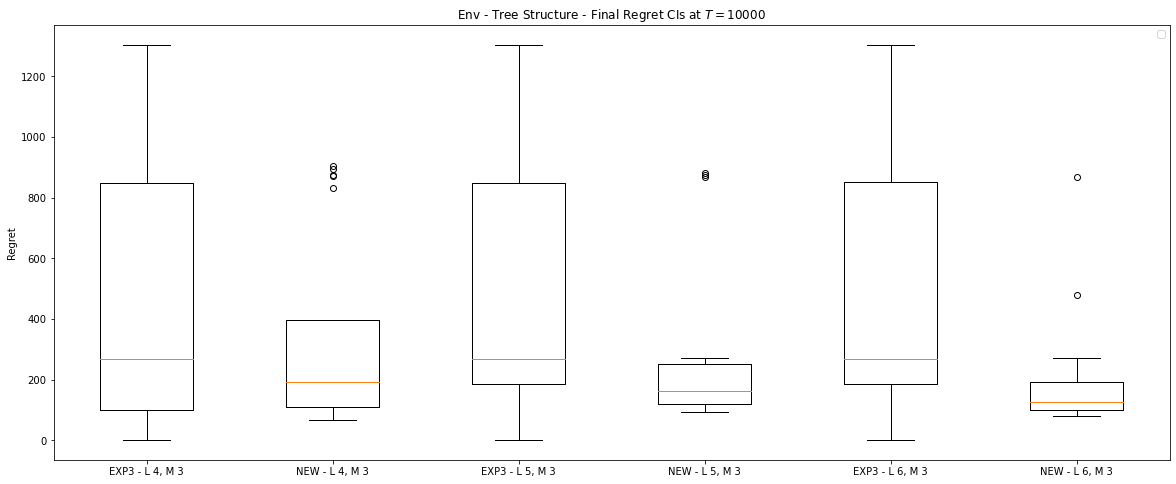

In [13]:
plt.figure(figsize=(20,8))
plt.boxplot(res, labels=labels)
plt.ylabel('Regret')
plt.title('Env - Tree Structure - Final Regret CIs at $T=10000$')
# plt.xscale('log')
# plt.yscale('log')
# ax1.set_ylim(1, 100)
# ax1.set_xlim(100, 1000)
plt.legend(ncol=2)
plt.savefig('figure_general_regret_depth_slice.pdf', bbox_inches = "tight")
plt.show()

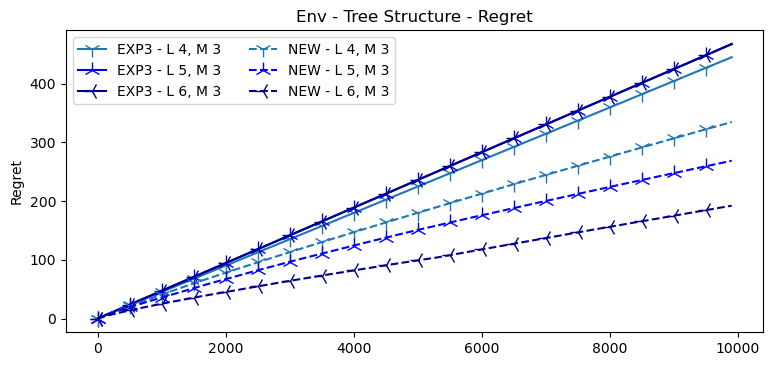

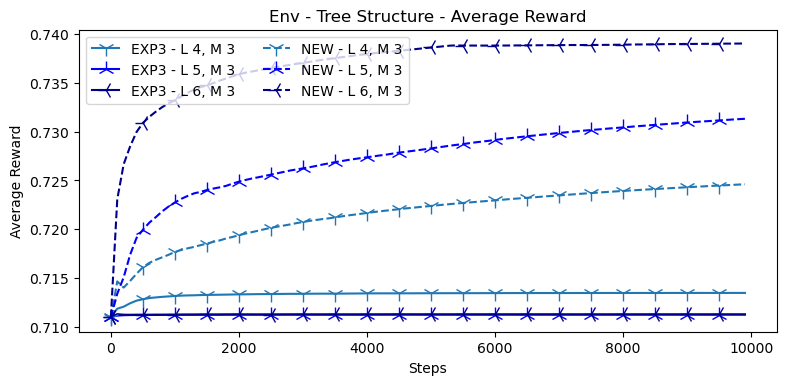

In [14]:
rounds = np.arange(1, max_rounds+1, 100)

colors_exp3 = ['#1f77b4', 'mediumpurple', 'mediumblue', 'grey']
colors_new = ['#ff7f0e', 'tomato', 'peru', 'gold']

colors_exp3 = ['#1f77b4', 'blue', 'darkblue']
# colors_new = ['#ff7f0e', 'tomato', 'peru', 'gold']
# colors_new = ['lightgreen', 'limegreen', 'forestgreen', 'darkgreen', 'darkcyan', 'darkslategrey']

settings = [(4, 3), (5, 3), (6, 3)]
markers = ['-', '--']
markers = ["1", "2", "3", "4"]


plt.figure(figsize=(9,4), dpi= 100, facecolor='w', edgecolor='k')
for idx, exp3_result in enumerate(exp3_results):
    # EXP3 
    c = colors_exp3[idx]
    exp3_regret, exp3_rgrt_std, exp3_reward, exp3_rwd_std = exp3_result
    plt.plot(rounds, exp3_regret, label='EXP3 - L {}, M {}'.format(settings[idx][0], settings[idx][1]), color=c, linestyle='-', 
             marker=markers[idx] , markersize=12 ,markevery=5)
# plt.plot(rounds, .5*rounds**(0.5), label='$t^{0.5}$', linestyle='-.')    
for idx, new_result in enumerate(new_results[:3]):
    # new
    c = colors_exp3[idx]
    new_regret, new_rgrt_std, new_reward, new_rwd_std = new_result
    plt.plot(rounds, new_regret, label='NEW - L {}, M {}'.format(settings[idx][0], settings[idx][1]), color=c, linestyle='--', 
             marker=markers[idx] , markersize=12 ,markevery=5)

# plt.xscale('log')
# plt.yscale('log')
plt.ylabel('Regret')
plt.title('Env - Tree Structure - Regret')
plt.legend(ncol=2)
plt.savefig('figure_general_regret_depth.pdf', bbox_inches = "tight")
plt.show()

plt.figure(figsize=(9,4), dpi= 100, facecolor='w', edgecolor='k')

for idx, exp3_result in enumerate(exp3_results):
    
    # EXP3 
    c = colors_exp3[idx]
    exp3_regret, exp3_rgrt_std, exp3_reward, exp3_rwd_std = exp3_result
    plt.plot(rounds, exp3_reward, label='EXP3 - L {}, M {}'.format(settings[idx][0], settings[idx][1]), color=c, linestyle='-',
             marker=markers[idx] , markersize=12 ,markevery=5)
    
for idx, new_result in enumerate(new_results):
        
    # new 
    c = colors_exp3[idx]
    new_regret, new_rgrt_std, new_reward, new_rwd_std = new_result
    plt.plot(rounds, new_reward, label='NEW - L {}, M {}'.format(settings[idx][0], settings[idx][1]), color=c, linestyle='--',
             marker=markers[idx] , markersize=12 ,markevery=5)
      
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Env - Tree Structure - Average Reward')
plt.legend(ncol=2)
plt.savefig('figure_general_avg_reward_depth.pdf', bbox_inches = "tight")

# fig.suptitle("Env - Blue Bus Red Bus Paradox", fontsize=14)
plt.show()

In [15]:
settings = [(1, 5), (1, 10), (1, 50)]
exp3_results = []
new_results = []
res=[]
labels=[]


for setting in tqdm(settings):
    nb_levels, nb_leaves_per_class = setting
    exp3_result, new_result, c, d = do_general_tree_experiment(nb_levels, nb_leaves_per_class)
    exp3_results.append(exp3_result)
    new_results.append(new_result)
    res_exp3.append((c))
    res_nexp.append(d)
    res.append(c)
    res.append(d)
    labels.append('EXP3 - L {}, M {}'.format(nb_levels, nb_leaves_per_class))
    labels.append('NEW - L {}, M {}'.format(nb_levels, nb_leaves_per_class))

  0%|          | 0/3 [00:00<?, ?it/s]

Running experiment with rnd seed 0, nb levels 1, nb leaves per class 5



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8139.78it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8902.74it/s]


Running experiment with rnd seed 1, nb levels 1, nb leaves per class 5



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9082.37it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8859.55it/s]


Running experiment with rnd seed 2, nb levels 1, nb leaves per class 5



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9417.21it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9192.88it/s]


Running experiment with rnd seed 3, nb levels 1, nb leaves per class 5



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9708.80it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9423.30it/s]


Running experiment with rnd seed 4, nb levels 1, nb leaves per class 5



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9047.42it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8820.85it/s]


Running experiment with rnd seed 5, nb levels 1, nb leaves per class 5



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9392.09it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8891.42it/s]


Running experiment with rnd seed 6, nb levels 1, nb leaves per class 5



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9688.45it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8902.02it/s]


Running experiment with rnd seed 7, nb levels 1, nb leaves per class 5



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9330.21it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8865.64it/s]


Running experiment with rnd seed 8, nb levels 1, nb leaves per class 5



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9409.74it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9140.36it/s]


Running experiment with rnd seed 9, nb levels 1, nb leaves per class 5



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9317.96it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8748.06it/s]


Running experiment with rnd seed 10, nb levels 1, nb leaves per class 5



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9527.16it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8925.70it/s]


Running experiment with rnd seed 11, nb levels 1, nb leaves per class 5



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9161.34it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9820.71it/s]


Running experiment with rnd seed 12, nb levels 1, nb leaves per class 5



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9123.87it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9230.23it/s]


Running experiment with rnd seed 13, nb levels 1, nb leaves per class 5



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9465.23it/s]

100%|████████████████████████████████████| 10000/10000 [00:00<00:00, 10285.27it/s]


Running experiment with rnd seed 14, nb levels 1, nb leaves per class 5



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9601.67it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8978.83it/s]


Running experiment with rnd seed 15, nb levels 1, nb leaves per class 5



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9013.30it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9069.54it/s]


Running experiment with rnd seed 16, nb levels 1, nb leaves per class 5



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9662.94it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8558.50it/s]


Running experiment with rnd seed 17, nb levels 1, nb leaves per class 5



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8980.26it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9825.41it/s]


Running experiment with rnd seed 18, nb levels 1, nb leaves per class 5



100%|████████████████████████████████████| 10000/10000 [00:00<00:00, 10511.70it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9093.41it/s]


Running experiment with rnd seed 19, nb levels 1, nb leaves per class 5



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9896.52it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8607.48it/s]


Running experiment with rnd seed 0, nb levels 1, nb leaves per class 10



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8974.12it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8614.81it/s]


Running experiment with rnd seed 1, nb levels 1, nb leaves per class 10



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9171.23it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8753.28it/s]


Running experiment with rnd seed 2, nb levels 1, nb leaves per class 10



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8911.67it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8374.68it/s]


Running experiment with rnd seed 3, nb levels 1, nb leaves per class 10



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9167.30it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9109.68it/s]


Running experiment with rnd seed 4, nb levels 1, nb leaves per class 10



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9378.14it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8922.69it/s]


Running experiment with rnd seed 5, nb levels 1, nb leaves per class 10



100%|████████████████████████████████████| 10000/10000 [00:00<00:00, 10496.37it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9421.83it/s]


Running experiment with rnd seed 6, nb levels 1, nb leaves per class 10



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9994.98it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8963.62it/s]


Running experiment with rnd seed 7, nb levels 1, nb leaves per class 10



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9302.58it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8664.62it/s]


Running experiment with rnd seed 8, nb levels 1, nb leaves per class 10



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9103.37it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8569.35it/s]


Running experiment with rnd seed 9, nb levels 1, nb leaves per class 10



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9592.19it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9089.40it/s]


Running experiment with rnd seed 10, nb levels 1, nb leaves per class 10



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9404.94it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9079.53it/s]


Running experiment with rnd seed 11, nb levels 1, nb leaves per class 10



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9763.20it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9169.64it/s]


Running experiment with rnd seed 12, nb levels 1, nb leaves per class 10



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9647.70it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8986.43it/s]


Running experiment with rnd seed 13, nb levels 1, nb leaves per class 10



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9308.05it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9007.63it/s]


Running experiment with rnd seed 14, nb levels 1, nb leaves per class 10



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9673.82it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9354.14it/s]


Running experiment with rnd seed 15, nb levels 1, nb leaves per class 10



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9559.45it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9202.02it/s]


Running experiment with rnd seed 16, nb levels 1, nb leaves per class 10



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9663.07it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9003.87it/s]


Running experiment with rnd seed 17, nb levels 1, nb leaves per class 10



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9323.86it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9101.68it/s]


Running experiment with rnd seed 18, nb levels 1, nb leaves per class 10



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9275.03it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9533.90it/s]


Running experiment with rnd seed 19, nb levels 1, nb leaves per class 10



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9671.40it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9112.98it/s]


Running experiment with rnd seed 0, nb levels 1, nb leaves per class 50



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9515.03it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8837.17it/s]


Running experiment with rnd seed 1, nb levels 1, nb leaves per class 50



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8909.88it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8782.86it/s]


Running experiment with rnd seed 2, nb levels 1, nb leaves per class 50



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9071.13it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8678.74it/s]


Running experiment with rnd seed 3, nb levels 1, nb leaves per class 50



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9103.86it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8837.90it/s]


Running experiment with rnd seed 4, nb levels 1, nb leaves per class 50



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9299.89it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8874.67it/s]


Running experiment with rnd seed 5, nb levels 1, nb leaves per class 50



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9193.08it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8847.52it/s]


Running experiment with rnd seed 6, nb levels 1, nb leaves per class 50



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9614.70it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8870.66it/s]


Running experiment with rnd seed 7, nb levels 1, nb leaves per class 50



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9110.65it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8636.64it/s]


Running experiment with rnd seed 8, nb levels 1, nb leaves per class 50



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9119.64it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8807.48it/s]


Running experiment with rnd seed 9, nb levels 1, nb leaves per class 50



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9580.13it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8803.62it/s]


Running experiment with rnd seed 10, nb levels 1, nb leaves per class 50



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9428.42it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8767.53it/s]


Running experiment with rnd seed 11, nb levels 1, nb leaves per class 50



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9419.55it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8935.85it/s]


Running experiment with rnd seed 12, nb levels 1, nb leaves per class 50



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9084.18it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8859.76it/s]


Running experiment with rnd seed 13, nb levels 1, nb leaves per class 50



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8711.08it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8780.50it/s]


Running experiment with rnd seed 14, nb levels 1, nb leaves per class 50



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9182.15it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9015.40it/s]


Running experiment with rnd seed 15, nb levels 1, nb leaves per class 50



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8803.52it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8568.99it/s]


Running experiment with rnd seed 16, nb levels 1, nb leaves per class 50



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9056.57it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8760.40it/s]


Running experiment with rnd seed 17, nb levels 1, nb leaves per class 50



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9155.50it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8558.66it/s]


Running experiment with rnd seed 18, nb levels 1, nb leaves per class 50



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9032.04it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8659.40it/s]


Running experiment with rnd seed 19, nb levels 1, nb leaves per class 50



100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 9143.44it/s]

100%|█████████████████████████████████████| 10000/10000 [00:01<00:00, 8925.80it/s]


No handles with labels found to put in legend.


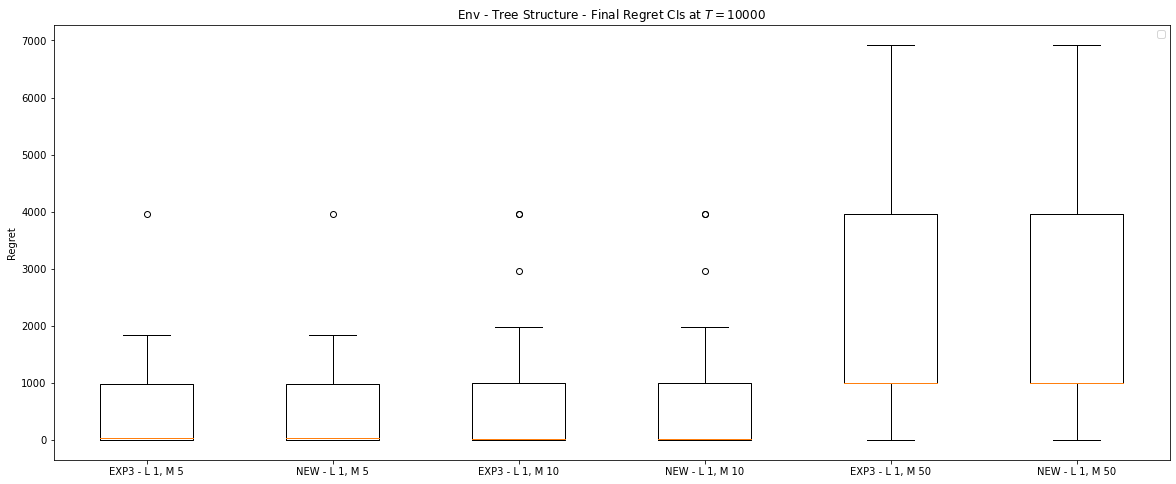

In [16]:
plt.figure(figsize=(20,8))
plt.boxplot(res, labels=labels)
plt.ylabel('Regret')
plt.title('Env - Tree Structure - Final Regret CIs at $T=10000$')
# plt.xscale('log')
# plt.yscale('log')
# ax1.set_ylim(1, 100)
# ax1.set_xlim(100, 1000)
plt.legend(ncol=2)
plt.savefig('figure_general_regret_depth_slice2.pdf', bbox_inches = "tight")
plt.show()

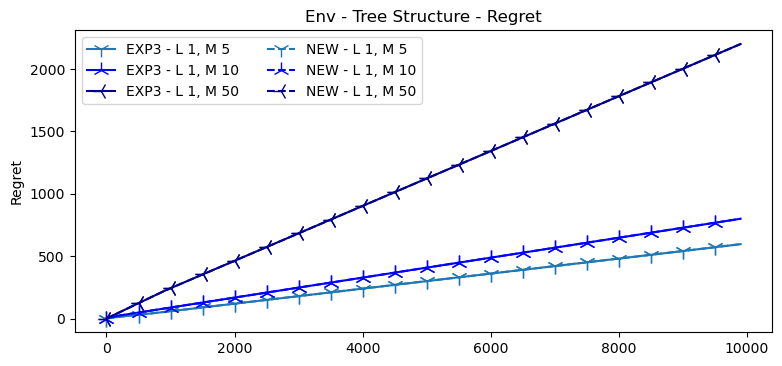

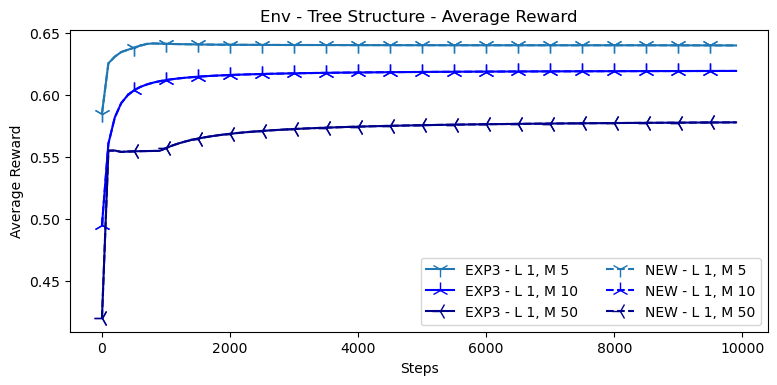

In [17]:
rounds = np.arange(1, max_rounds+1, 100)

colors_exp3 = ['#1f77b4', 'mediumpurple', 'mediumblue', 'grey']
colors_new = ['#ff7f0e', 'tomato', 'peru', 'gold']

colors_exp3 = ['#1f77b4', 'blue', 'darkblue']
# colors_new = ['#ff7f0e', 'tomato', 'peru', 'gold']
# colors_new = ['lightgreen', 'limegreen', 'forestgreen', 'darkgreen', 'darkcyan', 'darkslategrey']

# settings = [(5, 3), (6, 3), (7, 3)]
markers = ['-', '--']
markers = ["1", "2", "3", "4"]


plt.figure(figsize=(9,4), dpi= 100, facecolor='w', edgecolor='k')
for idx, exp3_result in enumerate(exp3_results):
    # EXP3 
    c = colors_exp3[idx]
    exp3_regret, exp3_rgrt_std, exp3_reward, exp3_rwd_std = exp3_result
    plt.plot(rounds, exp3_regret, label='EXP3 - L {}, M {}'.format(settings[idx][0], settings[idx][1]), color=c, linestyle='-', 
             marker=markers[idx] , markersize=12 ,markevery=5)
# plt.plot(rounds, .5*rounds**(0.5), label='$t^{0.5}$', linestyle='-.')    
for idx, new_result in enumerate(new_results[:3]):
    # new
    c = colors_exp3[idx]
    new_regret, new_rgrt_std, new_reward, new_rwd_std = new_result
    plt.plot(rounds, new_regret, label='NEW - L {}, M {}'.format(settings[idx][0], settings[idx][1]), color=c, linestyle='--', 
             marker=markers[idx] , markersize=12 ,markevery=5)

# plt.xscale('log')
# plt.yscale('log')
plt.ylabel('Regret')
plt.title('Env - Tree Structure - Regret')
plt.legend(ncol=2)
plt.savefig('figure_general_regret_depth2.pdf', bbox_inches = "tight")
plt.show()

plt.figure(figsize=(9,4), dpi= 100, facecolor='w', edgecolor='k')

for idx, exp3_result in enumerate(exp3_results):
    
    # EXP3 
    c = colors_exp3[idx]
    exp3_regret, exp3_rgrt_std, exp3_reward, exp3_rwd_std = exp3_result
    plt.plot(rounds, exp3_reward, label='EXP3 - L {}, M {}'.format(settings[idx][0], settings[idx][1]), color=c, linestyle='-',
             marker=markers[idx] , markersize=12 ,markevery=5)
    
for idx, new_result in enumerate(new_results):
        
    # new 
    c = colors_exp3[idx]
    new_regret, new_rgrt_std, new_reward, new_rwd_std = new_result
    plt.plot(rounds, new_reward, label='NEW - L {}, M {}'.format(settings[idx][0], settings[idx][1]), color=c, linestyle='--',
             marker=markers[idx] , markersize=12 ,markevery=5)
      
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Env - Tree Structure - Average Reward')
plt.legend(ncol=2)
plt.savefig('figure_general_avg_reward_depth2.pdf', bbox_inches = "tight")

# fig.suptitle("Env - Blue Bus Red Bus Paradox", fontsize=14)
plt.show()

### Visualisation tools

In [18]:
rd = 42
max_rounds = 10000
nb_leaves_per_class = 3
nb_levels = 4

settings = {
    'rd': rd,
    'max_rounds': max_rounds,
    'nb_leaves_per_class': nb_leaves_per_class,
    'nb_levels': nb_levels,
    'env': 'general',
    'algo': 'new',
}

env = get_env_by_name(settings)
env.set()
agent = get_algo_by_name(settings)
agent.set_environment(env)
metrics = agent.iterate_learning()

100%|█████████████████████████████████████| 10000/10000 [00:03<00:00, 3312.58it/s]


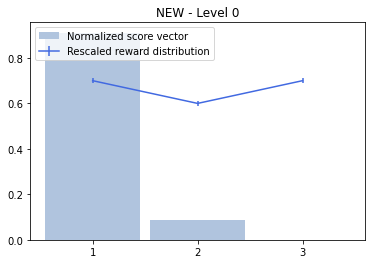

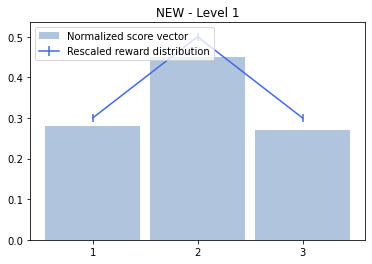

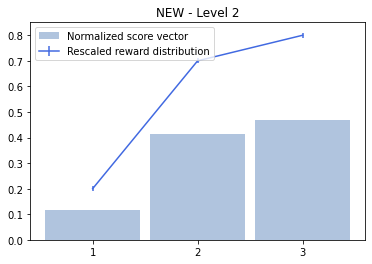

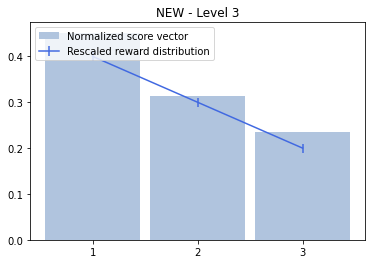

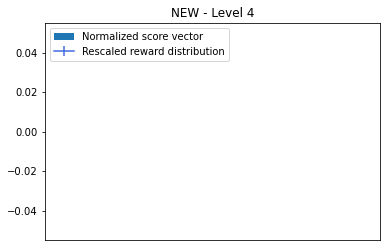

In [19]:
def visualize_scores_through_path(env, path=None):
    
    if not path:
        path = env.best_strategy_nodes_path
    def visualize_by_node(node, idx):

        scores = node.scores_children
        scores = scores/np.sum(scores)
        level_correction =  10**(-node.level)
        means = [node.value/level_correction for node in node.children]
        scales = 0.1 * 0.1
        x_idxes = np.arange(1, node.scores_children.shape[0]+1)
        plt.figure()
        plt.bar(x_idxes, scores, width=0.9, color='lightsteelblue', label='Normalized score vector')
        plt.errorbar(x_idxes, means, yerr=scales, label='Rescaled reward distribution', color='royalblue')
        plt.xticks(x_idxes)
        plt.legend(loc="upper left")
        plt.title("NEW - Level {}".format(node.level))
        plt.savefig('visualisation_new_level_{}.pdf'.format(node.level), bbox_inches = "tight")

    for idx, node in enumerate(path):
        visualize_by_node(node, idx)
        
visualize_scores_through_path(env)

  0%|          | 0/10000 [00:00<?, ?it/s]

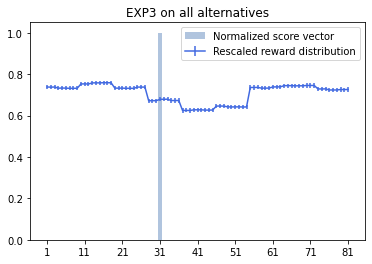

In [20]:


settings['algo'] = 'exp3' 

env = get_env_by_name(settings)
env.set()
agent = get_algo_by_name(settings)
agent.set_environment(env)

def visualize(scores):

    scores = score_vector/np.sum(score_vector)

    path_action_sets = [env.tree.get_parent_nodes(action_node) for action_node in agent.action_set]

    means = np.zeros_like(scores)

    for idx, path in enumerate(path_action_sets):
        means[idx] = np.sum([node.value for node in path])


    scales = 0.1 * 0.1
    x_idxes = np.arange(1, scores.shape[0]+1)
    plt.figure()
    plt.bar(x_idxes, scores, width=0.9, color='lightsteelblue', label='Normalized score vector')
    plt.errorbar(x_idxes, means, yerr=scales, label='Rescaled reward distribution', color='royalblue')
    x_ticks = np.arange(1, scores.shape[0]+1, 10)
    plt.xticks(x_ticks)
    plt.legend(loc="upper right")
    plt.title("EXP3 on all alternatives")
    plt.savefig('visualisation_exp3.pdf', bbox_inches = "tight")
    
self = agent
initial_dist = np.full(self.number_of_actions, 1.0 / self.number_of_actions)
score_vector = initial_dist

metrics = {
    'reward': [],
    'regret': [],
    'round': []
}
regrets = []
rewards = []
store_score = []
action_sampled = []


for round_ in tqdm(range(0, self.max_round)):

    # Choose action
    lr = 1/np.sqrt(round_+1)
    action, proba = self.sample_action(score_vector*lr)
    action_sampled.append(action)

    # Receive rewards from environment
    reward = self.environment.get_reward_by_path(self.paths_action_set[action])
    best_strategy_reward = self.environment.get_best_strategy_reward()
    regrets.append(best_strategy_reward - reward)
    rewards.append(reward)

    # Update scores
    score_vector = self.update_score(score_vector, proba, action, reward)
#     print(action, score_vector)
    store_score.append(score_vector)

    if round_ % 100 == 0:
        metrics['reward'].append(np.mean(rewards))
        regret = np.sum(regrets)
        metrics['regret'].append(regret)
        metrics['round'].append(round)

# Visualisation
# self.score_vector = score
        
visualize(score_vector)

